## 1. Regresion Lineal Multivariable

In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# Necesario para graficar superficies 3D
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

#para manejar tiempos
from datetime import datetime

# Modulo de optimizacion en scipy
from scipy import optimize

### 1.1 Cargamos los datos del dataset



In [2]:
#cargamos el dataset a un dataframe

# df = pd.read_csv('household_power_consumption.txt', delimiter=';')
df = pd.read_csv('household_power_consumption.txt', delimiter=';')

#mostramos el dataset
df

C:\Users\Manuel\AppData\Local\Temp\ipykernel_20468\1324377771.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


### 1.2 Analisis del dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
# # Suponiendo que tu DataFrame se llama df y la columna de fecha se llama 'Date'
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# # Calculamos la fracción del año con los días como decimales
# df['Date'] = df['Date'].dt.year + df['Date'].dt.dayofyear / 365.25

# # Convertimos la fracción del año a tipo de dato entero
# df['Date'] = (df['Date'] * 1000).astype(int) / 1000  # Redondeamos a 3 decimales

# Eliminar las columnas 'Date' y 'Time'
df.drop(['Date', 'Time'], axis=1, inplace=True)

df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


Se reemplazaran los datos con **"?"**, que representan datos faltantes o desconocidos, estos seran reemplazados con el valor 0:

In [6]:
#Ponemos 0 a los datos que tienen `?`
#a partir de la columna 3

# Reemplaza los valores "?" con 0 en las columnas desde la tercera en adelante
df = df.replace('?', 0)


Convertimos los datos de tipo object a datos de tipo float:

In [8]:
# df['Date'] = df['Date'].astype(float)
# df['Time'] = df['Time'].astype(float)
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


Ahora tenemos que analizar que columnas contienen datos con NAN, para eso mostramos que columnas tienen NAN en sus datos:

In [9]:
df = pd.DataFrame(df)
nan_counts = df.isnull().sum()
print(nan_counts)

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [10]:
#Como se puede ver la columna `SUb_metering_3`tiene **25979** datos que contienen NAN, para esto solucionaremos insertando la media de esa columan a cada lugar donde este un NAN:

# Calcular la media de cada columna
column_means = df.mean()

# Reemplazar los valores NaN con la media de cada columna
df = df.fillna(column_means)

df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [11]:
#Comprobamos que ya no haya datos NAN:
df = pd.DataFrame(df)
nan_counts = df.isnull().sum()
print(nan_counts)

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


Se observa que ya no hay datos NAN en la matriz, esto nos evitara errores al momento del calculo de thetas o entrenamiento del modelo.

In [12]:
#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop(['Global_active_power'], axis=1).values
y_test = test_dataset['Global_active_power'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['Global_active_power'], axis=1).values
y_train = train_dataset['Global_active_power'].values
m_train = len(y_train)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'Y'
))
print('-' * 90)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:14.3f}'.format(
        X_train[i, 0],
        X_train[i, 1],
        X_train[i, 2],
        X_train[i, 3],
        X_train[i, 4],
        X_train[i, 5],
        y_train[i]
    ))


    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]         Y
------------------------------------------------------------------------------------------
     0.000   244.740     0.800     0.000     0.000     0.000         0.192
     0.000   240.600     0.600     0.000     0.000     0.000         0.130
     0.098   242.400     1.000     0.000     0.000     0.000         0.208
     0.086   243.920     1.400     0.000     0.000     0.000         0.318
     0.098   244.250     1.800     0.000     1.000     1.000         0.382
     0.056   236.140     5.800     1.000     0.000    17.000         1.366
     0.182   241.340     9.200     0.000     2.000    18.000         2.244
     0.386   239.760     4.600     0.000     2.000    13.000         1.038
     0.212   243.260     2.000     0.000     0.000     0.000         0.406
     0.104   236.970     6.400     1.000     2.000    18.000         1.534


### 1.3 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.


Hacemos el uso de la siguiente funcion para normalizar los datos:

In [13]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [14]:
#Normalizamos los datos e Imprimimos algunos datos normalizados:
print(X_train.shape[1])
X_norm, mu, sigma = featureNormalize(X_train)
# imprimir todos las X de datos solo 10
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]'
))
print('-' * 80)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm[i, 0],
        X_norm[i, 1],
        X_norm[i, 2],
        X_norm[i, 3],
        X_norm[i, 4],
        X_norm[i, 5],
    ))

6
    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]
--------------------------------------------------------------------------------
    -1.083     0.256    -0.848    -0.181    -0.222    -0.770
    -1.083     0.103    -0.893    -0.181    -0.222    -0.770
    -0.214     0.170    -0.803    -0.181    -0.222    -0.770
    -0.320     0.226    -0.713    -0.181    -0.222    -0.770
    -0.214     0.238    -0.623    -0.181    -0.049    -0.651
    -0.586    -0.063     0.277    -0.017    -0.222     1.258
     0.531     0.130     1.042    -0.181     0.124     1.377
     2.339     0.072     0.007    -0.181     0.124     0.780
     0.797     0.201    -0.578    -0.181    -0.222    -0.770
    -0.161    -0.032     0.412    -0.017     0.124     1.377


### 1.4 Graficar las caracteristicas


In [15]:
# Graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

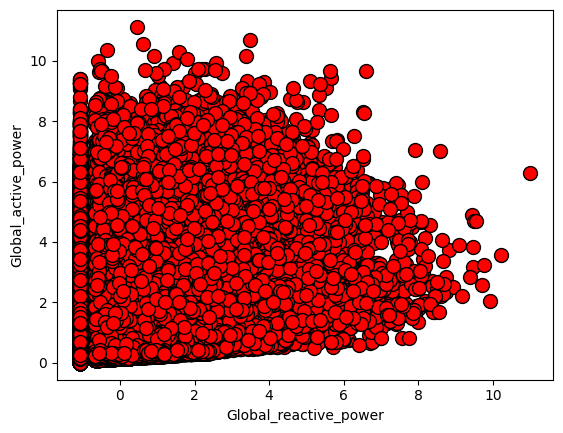

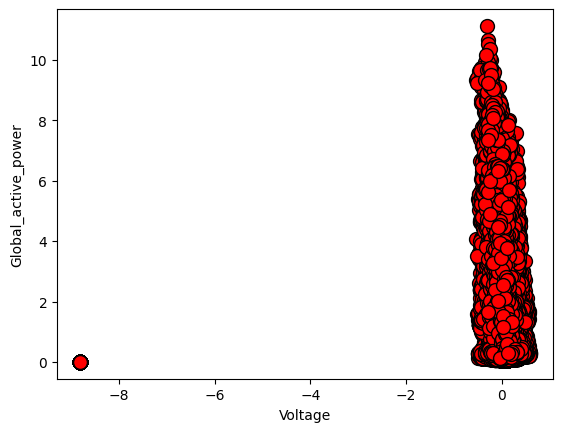

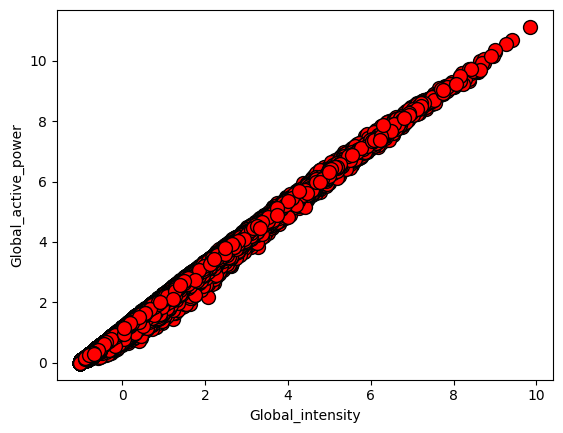

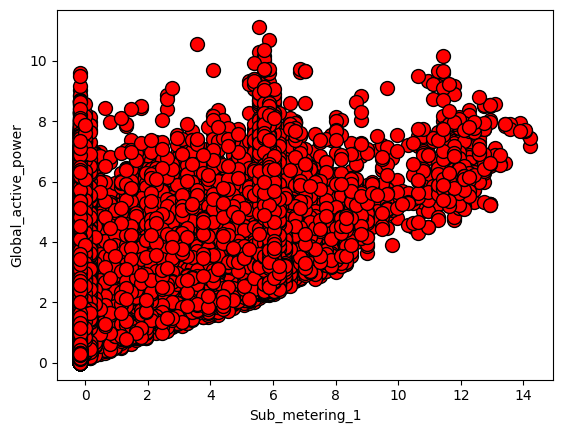

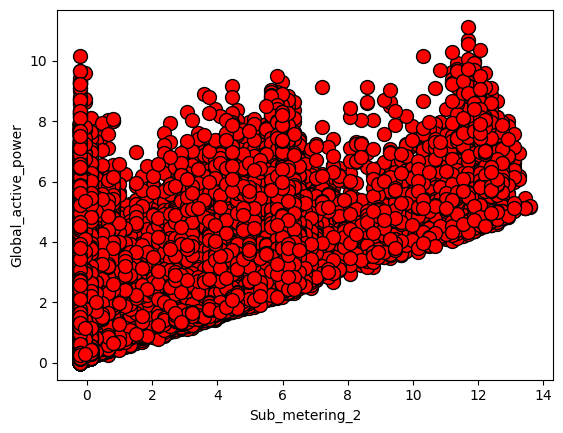

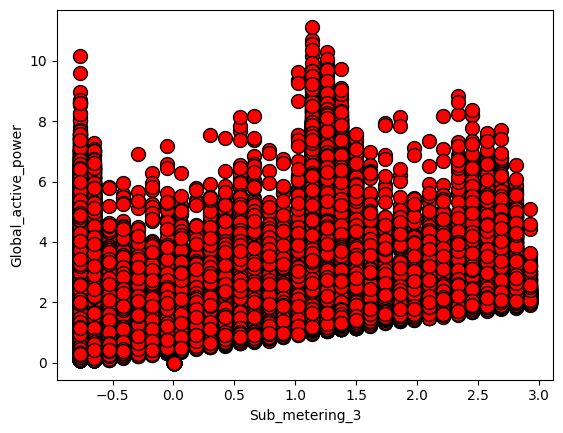

In [16]:

xlabel1 = "Global_reactive_power"
xlabel2 = "Voltage"
xlabel3 = "Global_intensity"
xlabel4 = "Sub_metering_1"
xlabel5 = "Sub_metering_2"
xlabel6 = "Sub_metering_3"


ylabel = "Global_active_power"

graficarDatos(X_norm[:, 0], y_train, xlabel1, ylabel)
graficarDatos(X_norm[:, 1], y_train, xlabel2, ylabel)
graficarDatos(X_norm[:, 2], y_train, xlabel3, ylabel)
graficarDatos(X_norm[:, 3], y_train, xlabel4, ylabel)
graficarDatos(X_norm[:, 4], y_train, xlabel5, ylabel)
graficarDatos(X_norm[:, 5], y_train, xlabel6, ylabel)





### 1.5 Añadimos la columna de unos
 graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos.

In [17]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print(X_ready.shape)
# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]' ))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready[i, 0],
        X_ready[i, 1],
        X_ready[i, 2],
        X_ready[i, 3],
        X_ready[i, 4],
        X_ready[i, 5],
        X_ready[i, 6]))

(1660207, 7)
    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -1.083     0.256    -0.848    -0.181    -0.222    -0.770
     1.000    -1.083     0.103    -0.893    -0.181    -0.222    -0.770
     1.000    -0.214     0.170    -0.803    -0.181    -0.222    -0.770
     1.000    -0.320     0.226    -0.713    -0.181    -0.222    -0.770
     1.000    -0.214     0.238    -0.623    -0.181    -0.049    -0.651
     1.000    -0.586    -0.063     0.277    -0.017    -0.222     1.258
     1.000     0.531     0.130     1.042    -0.181     0.124     1.377
     1.000     2.339     0.072     0.007    -0.181     0.124     0.780
     1.000     0.797     0.201    -0.578    -0.181    -0.222    -0.770
     1.000    -0.161    -0.032     0.412    -0.017     0.124     1.377


### 1.6 Descenso por el gradiente

In [18]:
def calcularCosto(X, y, theta, lambda_):
    m = y.size
    J = 0

    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta.copy()
    temp[0] = 0  # Excluimos theta_0 de la regularización
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [19]:
theta =np.array([0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7])
theta1=np.array([0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7])

print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

lambda_ = 1000

print(f"--------------------------------------------------------------------------------------")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta, lambda_)}")
print(f"--------------------------------------------------------------------------------------")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta1, lambda_)}")

7
########################################################################################################
con theta:[0.2 0.1 3.  0.2 1.1 2.  0.7] se obtiene un costo de: 6.685861299151174
########################################################################################################
con theta:[0.5 0.2 8.  0.7 1.3 8.  1.7] se obtiene un costo de: 66.75156988589883


#### 1.6.2 Descenso por el gradiente



In [20]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):
        # theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))
        theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]

        J_historico.append(calcularCosto(X, y, theta, lambda_))

    return theta, J_historico

In [21]:
#creamos un theta con 6 columnas de ceros
theta = np.zeros(X_train.shape[1] + 1)

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 3000
alpha = 0.0003
lambda_ = 1000

theta, J_historico = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_ite, lambda_)
print("-------------------------------------------------------------------------------------------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")
print(f"--------------------------------------------------------------------------------------------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

########################################################################################################
Los valores de theta calculados son:
theta 1: 1.0658419253239206
theta 2: 0.014603967993139833
theta 3: 0.026892964696135547
theta 4: 0.7706818333108794
theta 5: 0.12714894487004166
theta 6: 0.1134495362947126
theta 7: 0.19606806062628973
########################################################################################################
con un costo de: 0.012613448961861493 


### 1.7 Grafica de la convergencia del costo
graficamos el costo

Text(0, 0.5, 'Costo J')

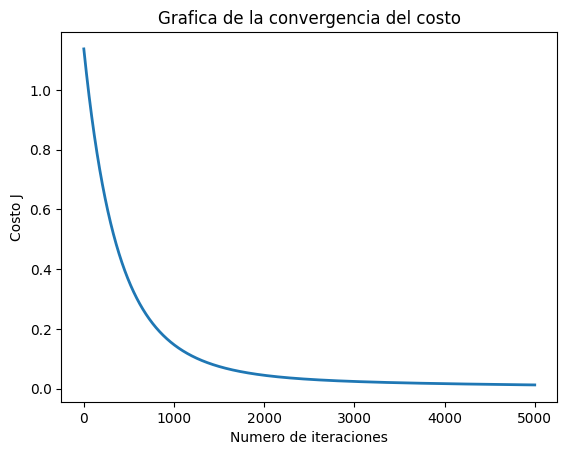

In [22]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Se puede observar que la grafica de convergencia del costo es aceptable evitando el overfiting.

### 1.8 Grafica de la regresion lineal
En esta parte se trazan los datos de entrenamiento y una línea que representa la regresión lineal ajustada a esos datos.

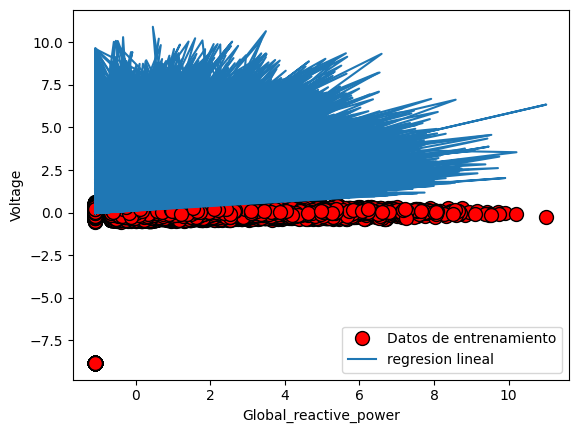

In [23]:
pyplot.rcParams['agg.path.chunksize'] = 10000  # Ajusta el tamaño del bloque de la ruta de renderizado


graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:,1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

haciendo una prediccion de prueba:

In [ ]:
X_array = np.array([ 1,2010.646,22.950,0.098,244.250,1.800,0.000,1.000,1.000])
X_array = X_array.reshape(1, -1)

X_array[:, 1:] = (X_array[:, 1:] - mu) / sigma

prediccion = np.dot(X_array, theta)

print (f"La prediccion de  consumo electrico es: {prediccion}")

La prediccion de de consumo electrico es: [0.4817864]
